In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt 
import torch
from torch.optim import Adam
from torch.utils.data import DataLoader

In [3]:
from datamodels.grassy_mnist import get_grassy_mnist
from models.cvae import ContrastiveVAE
from models.vae import VAE
from models.train import train
from datamodels.utils import s_score

In [4]:
BATCH_SIZE = 128
EPOCHS = 100
trials = 10

In [5]:
target, target_labels, background = get_grassy_mnist(scale=2) ## SCALE

In [6]:
# cVAE
ss_cvae = []
for trial in range(trials):
    print(f"Trial {trial}")
    ds = torch.stack([target, background], axis=1)
    dataloader = DataLoader(dataset=ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
    model = ContrastiveVAE(input_dim=28*28, hidden_dim=32, latent_dim=2, tc=True)

    optimizer = Adam(model.parameters(), lr=1e-4)
    losses = train(model, dataloader, optimizer, epochs=EPOCHS, plot=False)
    ss, _ = s_score(model.s_encoder, target, target_labels)
    ss_cvae.append(ss)

Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9


In [8]:
# VAE
ss_vae = []
for trial in range(trials):
    print(f"Trial {trial}")
    dataloader = DataLoader(dataset=target, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
    model = VAE(input_dim=28*28, hidden_dim=32, latent_dim=2, use_bias=True)

    optimizer = Adam(model.parameters(), lr=1e-4)
    losses = train(model, dataloader, optimizer, epochs=EPOCHS, plot=False)
    ss, _ = s_score(model.encoder, target, target_labels)
    ss_vae.append(ss)

Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9


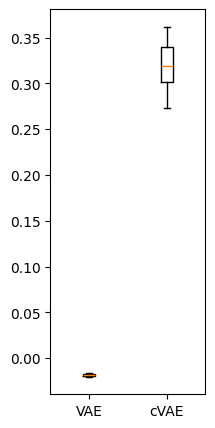

In [27]:
_, ax = plt.subplots(figsize=(2,5))
ax.boxplot([
    [s[0] for s in ss_vae],
    [s[0] for s in ss_cvae],
])

ax.set_xticklabels(["VAE", "cVAE"]);